In [1]:
from layers.Embed import DFT_series_decomp
import numpy as np
import torch
import torch.nn as nn

In [2]:
import pandas as pd
from sklearn.preprocessing import StandardScaler

data_path = './dataset/exchange_rate/'
data_file = 'exchange_rate.csv'

df_data = pd.read_csv(data_path + data_file)

In [3]:
df_data = df_data.drop(columns=['date'])

In [4]:
df_data

,0,1,2,3,4,5,6,OT
0,0.785500,1.611000,0.861698,0.634196,0.211242,0.006838,0.525486,0.593000
1,0.781800,1.610000,0.861104,0.633513,0.211242,0.006863,0.523972,0.594000
2,0.786700,1.629300,0.861030,0.648508,0.211242,0.006975,0.526316,0.597300
3,0.786000,1.637000,0.862069,0.650618,0.211242,0.006953,0.523834,0.597000
4,0.784900,1.653000,0.861995,0.656254,0.211242,0.006940,0.527426,0.598500
...,...,...,...,...,...,...,...,...
7583,0.718494,1.222195,0.737485,0.969974,0.143697,0.008500,0.688565,0.690846
7584,0.721839,1.223459,0.741155,0.977297,0.143763,0.008595,0.690288,0.695701
7585,0.723197,1.234111,0.745184,0.984446,0.143997,0.008562,0.691419,0.695943
7586,0.720825,1.233905,0.744131,0.980344,0.143993,0.008555,0.690942,0.692689


In [5]:
seq_len = 96

num_total = len(df_data)
num_train = int(num_total * 0.7)
num_test = int(num_total * 0.2)
num_val = num_total - num_train - num_test
border1s = [0, num_train - seq_len, num_total - num_test - seq_len]
border2s = [num_train, num_train + num_val, num_total]


In [6]:
from sklearn.preprocessing import StandardScaler
data_indices_obj = { 
    k: list(range(border1s[k], border2s[k])) for k in range(3)
}
train_indices = data_indices_obj[0]
train_data = df_data.iloc[train_indices]
scaler = StandardScaler()
scaler.fit(train_data.values)
data = scaler.transform(df_data.values)

In [7]:
data_train = data[data_indices_obj[0]]
data_val = data[data_indices_obj[1]]
data_test = data[data_indices_obj[2]]

In [8]:
data_train_split = [data[j:j+96] for j in data_indices_obj[0] if j <=data_indices_obj[0][-1]-96]

In [9]:
len(data_train_split)

5215

In [10]:
data_val_split = [data[j:j+96] for j in data_indices_obj[1] if j <=data_indices_obj[1][-1]-96]
data_test_split = [data[j:j+96] for j in data_indices_obj[2] if j <=data_indices_obj[2][-1]-96]

In [11]:
len(data_val_split), len(data_test_split)

(760, 1517)

In [ ]:
# test DFT_series -> FAIL

In [29]:
model = DFT_series_decomp()
model.train()



DFT_series_decomp()

In [30]:
model.eval()

DFT_series_decomp()

In [42]:
import torch
import torch.nn as nn

torch_data_0 = torch.Tensor(data_train_split[0])
torch_data_0 = torch_data_0.permute(1,0)

seasonal, trend = model(torch_data_0)
seasonal = seasonal.permute(1,0)
trend = trend.permute(1,0)

In [43]:
seasonal.shape, trend.shape

(torch.Size([96, 8]), torch.Size([96, 8]))

In [45]:
torch_data_0.permute(1,0)

tensor([[ 0.6068, -0.3617,  0.7354, -1.1644,  2.8519, -1.8614, -1.8200, -0.1241],
        [ 0.5709, -0.3676,  0.7296, -1.1709,  2.8519, -1.8387, -1.8473, -0.1136],
        [ 0.6184, -0.2525,  0.7289, -1.0275,  2.8519, -1.7370, -1.8051, -0.0790],
        [ 0.6116, -0.2065,  0.7390, -1.0073,  2.8519, -1.7569, -1.8497, -0.0821],
        [ 0.6010, -0.1110,  0.7382, -0.9534,  2.8519, -1.7687, -1.7852, -0.0664],
        [ 0.6175, -0.1068,  0.7289, -0.9665,  2.8519, -1.8169, -1.8076, -0.0087],
        [ 0.6369, -0.0573,  0.7469, -0.9065,  2.8519, -1.8187, -1.7827,  0.0228],
        [ 0.6601, -0.0883,  0.7605, -0.9211,  2.8519, -1.8250, -1.7827,  0.0375],
        [ 0.6883, -0.0125,  0.7598, -0.8303,  2.8519, -1.8250, -1.7727,  0.0700],
        [ 0.6446, -0.0871,  0.7032, -0.9232,  2.8519, -1.8287, -1.7727,  0.0438],
        [ 0.6669, -0.1319,  0.7103, -0.8821,  2.8519, -1.8296, -1.7500,  0.0753],
        [ 0.6902, -0.1617,  0.6586, -0.9315,  2.8519, -1.8559, -1.7551,  0.0963],
        [ 0.6844

In [46]:
seasonal

tensor([[ 0.0000, -0.3617,  0.7354, -1.1644,  2.8519, -1.8614, -1.8200, -0.1241],
        [ 0.0000, -0.3676,  0.7296, -1.1709,  2.8519, -1.8387, -1.8473, -0.1136],
        [ 0.0000, -0.2525,  0.7289, -1.0275,  2.8519, -1.7370, -1.8051, -0.0790],
        [ 0.0000, -0.2065,  0.7390, -1.0073,  2.8519, -1.7569, -1.8497, -0.0821],
        [ 0.0000, -0.1110,  0.7382, -0.9534,  2.8519, -1.7687, -1.7852, -0.0664],
        [ 0.0000, -0.1068,  0.7289, -0.9665,  2.8519, -1.8169, -1.8076, -0.0087],
        [ 0.0000, -0.0573,  0.7469, -0.9065,  2.8519, -1.8187, -1.7827,  0.0228],
        [ 0.0000, -0.0883,  0.7605, -0.9211,  2.8519, -1.8250, -1.7827,  0.0375],
        [ 0.0000, -0.0125,  0.7598, -0.8303,  2.8519, -1.8250, -1.7727,  0.0700],
        [ 0.0000, -0.0871,  0.7032, -0.9232,  2.8519, -1.8287, -1.7727,  0.0438],
        [ 0.0000, -0.1319,  0.7103, -0.8821,  2.8519, -1.8296, -1.7500,  0.0753],
        [ 0.0000, -0.1617,  0.6586, -0.9315,  2.8519, -1.8559, -1.7551,  0.0963],
        [ 0.0000

In [47]:
trend

tensor([[ 6.0678e-01,  0.0000e+00,  0.0000e+00,  1.1921e-07, -2.3842e-07,
          0.0000e+00,  0.0000e+00,  7.4506e-09],
        [ 5.7090e-01,  2.9802e-08, -1.1921e-07,  1.1921e-07, -2.3842e-07,
          1.1921e-07,  2.3842e-07,  2.2352e-08],
        [ 6.1842e-01,  0.0000e+00,  0.0000e+00,  0.0000e+00, -4.7684e-07,
         -1.1921e-07,  0.0000e+00,  0.0000e+00],
        [ 6.1163e-01,  1.4901e-08, -5.9605e-08,  0.0000e+00, -4.7684e-07,
          3.5763e-07, -1.1921e-07,  1.4901e-08],
        [ 6.0097e-01,  7.4506e-09,  5.9605e-08,  0.0000e+00, -2.3842e-07,
          1.1921e-07, -1.1921e-07, -2.2352e-08],
        [ 6.1745e-01,  7.4506e-09, -1.7881e-07,  0.0000e+00, -2.3842e-07,
          2.3842e-07,  2.3842e-07, -1.3970e-08],
        [ 6.3685e-01, -2.2352e-08,  0.0000e+00,  5.9605e-08, -2.3842e-07,
          2.3842e-07, -1.1921e-07,  5.5879e-08],
        [ 6.6013e-01,  7.4506e-09,  0.0000e+00, -5.9605e-08, -2.3842e-07,
          2.3842e-07,  0.0000e+00,  2.2352e-08],
        [ 6.8825

In [48]:
model.train()
ses_list = []
tre_list = []
for ut in data_train_split:
    ut_t = torch.Tensor(ut).permute(1,0)
    ses, tre = model(ut_t)
    ses = ses.permute(1,0).numpy()
    tre = tre.permute(1,0).numpy()
    ses_list.append(ses)
    tre_list.append(tre)

model.eval()

DFT_series_decomp()

In [50]:
ses_test_list = []
tre_test_list = []

for utt in data_test_split:
    utt_t = torch.Tensor(utt).permute(1,0)
    ses, tre = model(utt_t)
    ses = ses.permute(1,0).numpy()
    tre = tre.permute(1,0).numpy()
    ses_test_list.append(ses)
    tre_test_list.append(tre)

In [52]:
ses_test_list[0], tre_test_list[0]

(array([[ 0.        , -0.67234385,  1.843017  ,  2.7828264 ,  0.781095  ,
          3.2196968 ,  2.7975276 ,  1.9491304 ],
        [ 0.        , -0.6723438 ,  1.8430166 ,  2.782826  ,  0.781095  ,
          3.2196968 ,  2.7920284 ,  1.9491302 ],
        [ 0.        , -0.68885136,  1.7960157 ,  2.7240543 ,  0.7805214 ,
          3.3395715 ,  2.7536566 ,  1.9073672 ],
        [ 0.        , -0.64674675,  1.8356569 ,  2.7157702 ,  0.7825104 ,
          3.3550103 ,  2.8048608 ,  1.9570106 ],
        [ 0.        , -0.6856705 ,  1.829224  ,  2.6982174 ,  0.7874446 ,
          3.3214092 ,  2.8118515 ,  1.955699  ],
        [ 0.        , -0.73200643,  1.7426199 ,  2.6571708 ,  0.7874445 ,
          3.365     ,  2.7539983 ,  1.8898748 ],
        [ 0.        , -0.61308104,  1.8986343 ,  2.8482466 ,  0.7906576 ,
          3.3005219 ,  2.919615  ,  2.0742939 ],
        [ 0.        , -0.6030845 ,  1.9135187 ,  2.8634555 ,  0.79073405,
          3.305971  ,  2.9386656 ,  2.063496  ],
        [ 0.    

In [14]:
!pip install cvxopt

In [15]:
from frstl import fast_robustSTL
import numpy as np
import matplotlib.pyplot as plt 
from frstl.frstl import sinewave, quick_viz

/home/yohan/anaconda3/envs/itransformer/lib/python3.10/site-packages/tqdm/auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


array([ 0.60678468, -0.36167108,  0.7353669 , -1.16437337,  2.85188984,
       -1.86136865, -1.82004728, -0.12408112])

In [27]:
# Find ACF
# correlation
acf_list = []
for ct in range(1, len(data_train)//3):
    acf_ct = [np.corrcoef(data[:num_train-ct, var], data[ct:num_train, var])[0,1] for var in range(data.shape[1])]
    acf_list.append(acf_ct)

In [28]:
acf_list_arr = np.array(acf_list)

In [29]:
len(acf_list_arr)

1769

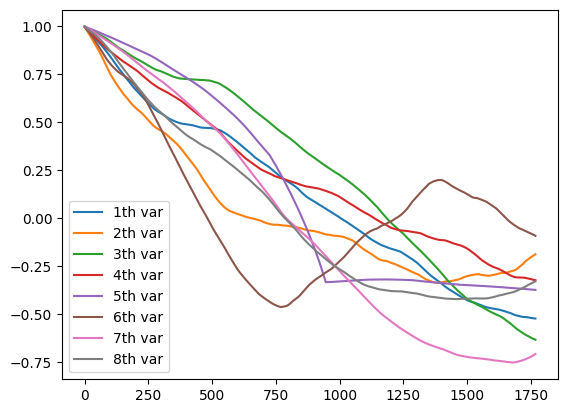

In [32]:
import matplotlib.pyplot as plt

xl  = range(len(acf_list_arr))
for j in range(8):
    plt.plot(xl, acf_list_arr[:,j], label=f'{j+1}th var')

plt.legend()
plt.show()
    

In [4]:
data_path_2 = './dataset/weather/'
data_file_2 = 'weather_re.csv'

df_data_2 = pd.read_csv(data_path_2 + data_file_2)

In [5]:
df_data_2 = df_data_2.drop(columns=['date'])

In [6]:
df_data_2.shape

(52696, 21)

In [7]:
seq_len = 96

num_total_2 = len(df_data_2)
num_train_2 = int(num_total_2 * 0.7)
num_test_2 = int(num_total_2 * 0.2)
num_val_2 = num_total_2 - num_train_2 - num_test_2
border1s_2 = [0, num_train_2 - seq_len, num_total_2 - num_test_2 - seq_len]
border2s_2 = [num_train_2, num_train_2 + num_val_2, num_total_2]

In [8]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()

In [9]:
data_indices_obj_2 = { 
    k: list(range(border1s_2[k], border2s_2[k])) for k in range(3)
}
train_indices_2 = data_indices_obj_2[0]
train_data_2 = df_data_2.iloc[train_indices_2]
scaler.fit(train_data_2.values)
data_2 = scaler.transform(df_data_2.values)

In [10]:
data_2.shape[1]

21

In [51]:
data_train_2 = data_2[data_indices_obj_2[0]]
data_val_2 = data_2[data_indices_obj_2[1]]
data_test_2 = data_2[data_indices_obj_2[2]]

In [52]:
data_train_split_2 = [data_2[j:j+96] for j in data_indices_obj_2[0] if j <=data_indices_obj_2[0][-1]-96]
data_val_split_2 = [data_2[j:j+96] for j in data_indices_obj_2[1] if j <=data_indices_obj_2[1][-1]-96]
data_test_split_2 = [data_2[j:j+96] for j in data_indices_obj_2[2] if j <=data_indices_obj_2[2][-1]-96]

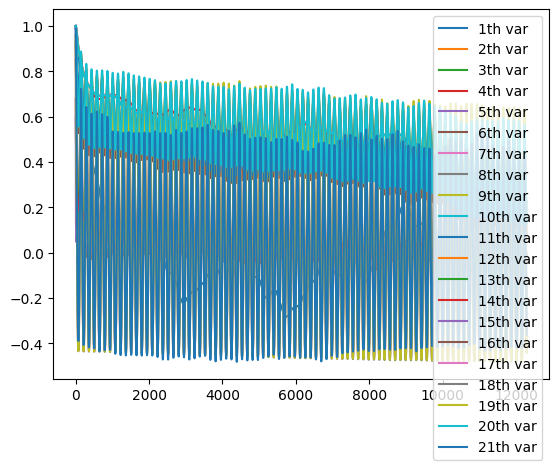

In [61]:
acf_list_2 = []
for ct in range(1, len(data_train_2)//3):
    acf_ct_2 = [np.corrcoef(data_2[:num_train_2-ct, var], data_2[ct:num_train_2, var])[0,1] for var in range(data_2.shape[1])]
    acf_list_2.append(acf_ct_2)
acf_list_arr_2 = np.array(acf_list_2)

x2  = range(len(acf_list_arr_2))
for j in range(data_2.shape[1]):
    plt.plot(x2, acf_list_arr_2[:,j], label=f'{j+1}th var')

plt.legend()
plt.show()
    

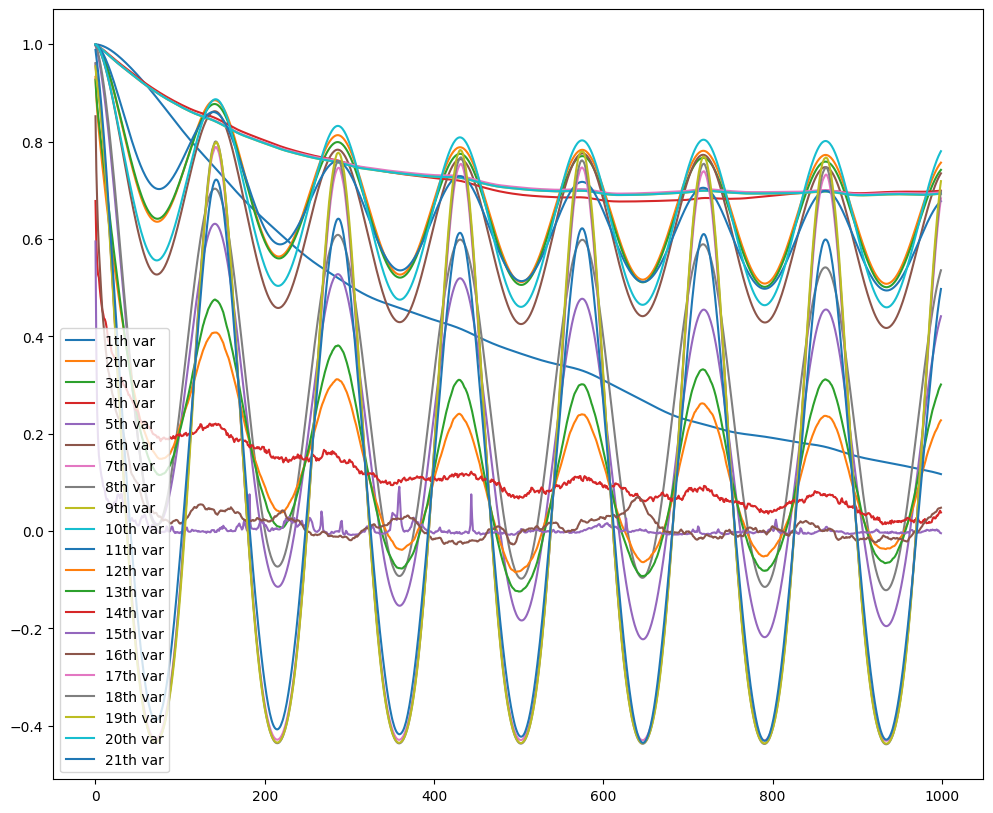

In [67]:
xt = 1000
plt.figure(figsize=(12, 10))
for j in range(data_2.shape[1]):
    plt.plot(range(xt), acf_list_arr_2[:xt,j], label=f'{j+1}th var')


plt.legend()
plt.show()

In [70]:
max_pattern = [] # 1~21까지
min_pattern = [] 
for j in range(data_2.shape[1]):
    max_dict = {}
    min_dict = {}
    for k in range(1, len(data_train_2)//3):
        if k == 1:
            max_dict[1] = acf_list_arr_2[k, j]
        else:
            if k>4 and k< len(data_train_2)//3 - 4:
                k_near_max = np.max(acf_list_arr_2[k-4:k+4, j])
                k_near_min = np.min(acf_list_arr_2[k-4:k+4, j])
                if acf_list_arr_2[k,j] == k_near_max:
                    max_dict[k] = acf_list_arr_2[k, j]
                elif acf_list_arr_2[k,j] == k_near_min:
                    min_dict[k] = acf_list_arr_2[k, j]

    max_pattern.append(max_dict)
    min_pattern.append(min_dict)
            


In [71]:
max_pattern

[{1: 0.9997707728194375,
  1303: 0.04796025046933949,
  1356: 0.04723166209698343,
  2020: 0.10070136714065887,
  2146: 0.09393732160267178,
  2581: -0.08774785850432057,
  3172: -0.17218977486145876,
  3612: -0.09650523400274066,
  3737: -0.10246437467975998,
  4028: -0.035079483830470014,
  4476: -0.020878318199592148,
  4894: -0.10716565891339186,
  5405: -0.16554624145150457,
  6058: -0.23469494804386268,
  6778: -0.014673504895130793,
  7199: -0.09734097649639334,
  7490: -0.024693988805490456,
  7544: -0.028080809549711948,
  8639: 0.12352495116874061,
  8989: 0.22723161339132109,
  9371: 0.1247545624568943,
  9431: 0.12803482121539062,
  9927: 0.06961716824305463,
  10057: 0.05026113468778599,
  10212: 0.037172148909979615,
  10356: 0.04016123800233172,
  10438: 0.02887591104214573,
  10870: 0.1603646319656338,
  11963: -0.1505687976315609,
  12176: -0.10493945888011828,
  12219: -0.10518698577443196},
 {1: 0.9980913777280829,
  141: 0.8849231814658316,
  286: 0.8132269939404637

In [72]:
min_pattern

[{1179: 0.034139665623861275,
  1333: 0.04679475483622359,
  1624: -0.04023793161792284,
  2124: 0.09344474418542827,
  2562: -0.08816235933945729,
  2932: -0.22423031098693036,
  3211: -0.1747335886135549,
  3714: -0.10317707199329303,
  3782: -0.10623339784300137,
  4270: -0.10152039239598384,
  4860: -0.10870981389120578,
  5217: -0.20245850796259293,
  5723: -0.2844544863416101,
  6068: -0.2347698795157804,
  7156: -0.10052440056586162,
  7232: -0.09921273295501945,
  7540: -0.02808698547578249,
  7872: -0.13446822900999383,
  8672: 0.12146369339370464,
  9306: 0.11619470351927298,
  9384: 0.12462181892776177,
  9702: 0.017012798449950954,
  10054: 0.05025197778228596,
  10188: 0.036571412607301595,
  10259: 0.032617891535798894,
  10436: 0.02887365108896963,
  10454: 0.02878314110617828,
  11855: -0.1589312136871058,
  11968: -0.15057761680569376,
  12200: -0.10547389438717299,
  12280: -0.1133841890677916},
 {73: 0.6353121133134236,
  217: 0.5638244751926307,
  360: 0.52674205744

In [73]:
# max_pattern key count
max_key_count = {}
min_key_count = {}
for pat in max_pattern:
    for key in pat.keys():
        tmp = max_key_count.get(key, 0)
        max_key_count[key] = tmp +1 if tmp !=0 else 1
for pat in min_pattern:
    for key in pat.keys():
        tmp = min_key_count.get(key, 0)
        min_key_count[key] = tmp +1 if tmp !=0 else 1

In [74]:
max_key_count.

{1: 21,
 1303: 1,
 1356: 2,
 2020: 1,
 2146: 1,
 2581: 1,
 3172: 1,
 3612: 1,
 3737: 3,
 4028: 1,
 4476: 1,
 4894: 8,
 5405: 1,
 6058: 2,
 6778: 2,
 7199: 1,
 7490: 1,
 7544: 2,
 8639: 2,
 8989: 2,
 9371: 1,
 9431: 1,
 9927: 1,
 10057: 1,
 10212: 1,
 10356: 1,
 10438: 2,
 10870: 1,
 11963: 1,
 12176: 1,
 12219: 1,
 141: 6,
 286: 6,
 431: 9,
 575: 13,
 718: 8,
 863: 9,
 1007: 13,
 1151: 9,
 1295: 7,
 1439: 9,
 1582: 11,
 1726: 6,
 1870: 12,
 2014: 11,
 2158: 12,
 2302: 7,
 2446: 6,
 2590: 11,
 2734: 7,
 2878: 7,
 3022: 15,
 3166: 8,
 3310: 11,
 3454: 9,
 3597: 7,
 3742: 8,
 3885: 5,
 4029: 6,
 4173: 9,
 4318: 7,
 4462: 10,
 4605: 7,
 4750: 9,
 5037: 7,
 5181: 9,
 5325: 10,
 5469: 9,
 5613: 9,
 5757: 5,
 5901: 8,
 6045: 7,
 6188: 7,
 6331: 7,
 6476: 9,
 6620: 12,
 6764: 10,
 6907: 4,
 7051: 4,
 7196: 9,
 7340: 6,
 7484: 10,
 7627: 5,
 7771: 7,
 7915: 7,
 8059: 7,
 8202: 5,
 8346: 8,
 8491: 7,
 8635: 6,
 8778: 3,
 8922: 5,
 9066: 4,
 9211: 5,
 9354: 8,
 9497: 6,
 9642: 5,
 9785: 5,
 9929:

In [76]:
max_key_count_r = {}
min_key_count_r = {}
for k in sorted(max_key_count.keys()):
    max_key_count_r[k] = max_key_count[k]
for k in sorted(min_key_count.keys()):
    min_key_count_r[k] = min_key_count[k]

In [77]:
max_key_count_r

{1: 21,
 31: 1,
 43: 1,
 58: 2,
 67: 1,
 81: 1,
 84: 1,
 88: 1,
 90: 1,
 92: 1,
 95: 1,
 100: 1,
 101: 1,
 107: 1,
 108: 1,
 113: 1,
 114: 1,
 117: 1,
 124: 2,
 127: 1,
 132: 1,
 134: 1,
 135: 1,
 138: 1,
 139: 1,
 141: 6,
 142: 5,
 143: 2,
 148: 1,
 151: 1,
 160: 2,
 167: 1,
 170: 1,
 173: 1,
 176: 1,
 181: 1,
 182: 1,
 186: 1,
 191: 2,
 197: 2,
 199: 1,
 205: 1,
 209: 1,
 214: 1,
 220: 1,
 221: 1,
 225: 2,
 229: 1,
 234: 1,
 235: 1,
 238: 1,
 239: 1,
 244: 1,
 250: 1,
 253: 1,
 257: 1,
 260: 1,
 267: 1,
 269: 1,
 270: 1,
 279: 2,
 280: 1,
 285: 2,
 286: 6,
 287: 5,
 289: 1,
 291: 1,
 294: 1,
 295: 1,
 296: 1,
 300: 1,
 315: 1,
 319: 1,
 320: 1,
 321: 1,
 327: 1,
 328: 1,
 329: 1,
 343: 1,
 348: 1,
 351: 2,
 353: 1,
 357: 1,
 358: 1,
 359: 1,
 365: 1,
 369: 1,
 372: 1,
 376: 1,
 380: 1,
 386: 1,
 397: 1,
 406: 1,
 407: 2,
 412: 1,
 415: 2,
 417: 1,
 418: 1,
 421: 1,
 422: 1,
 425: 1,
 427: 1,
 429: 1,
 430: 2,
 431: 9,
 432: 2,
 433: 1,
 437: 1,
 444: 2,
 445: 1,
 453: 1,
 456: 1,
 46

In [11]:
from statsmodels.tsa.seasonal import seasonal_decompose


In [79]:
!pip install statsmodels

  Using cached patsy-0.5.6-py2.py3-none-any.whl.metadata (3.5 kB)
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 10.8/10.8 MB 11.5 MB/s eta 0:00:00m eta 0:00:010:00:01
Using cached patsy-0.5.6-py2.py3-none-any.whl (233 kB)


In [80]:
from statsmodels.tsa.seasonal import seasonal_decompose

In [86]:
seasonal_decompose_result = seasonal_decompose(data_2, model='additive', period=142)

In [91]:
seasonal_decompose_result.seasonal

array([[ 0.00245014,  0.00531116,  0.00477461, ...,  0.03076171,
         0.00708224, -0.03654584],
       [ 0.00126411,  0.00609952,  0.00559951, ...,  0.02603821,
         0.00742624, -0.03110455],
       [ 0.00076384,  0.00783708,  0.00737375, ...,  0.00688843,
         0.00787911, -0.02639531],
       ...,
       [ 0.00197089,  0.01395171,  0.01329897, ...,  0.02246206,
         0.00496   , -0.01583033],
       [ 0.00224419,  0.01410563,  0.01343699, ...,  0.02843334,
         0.00472418,  0.00012095],
       [ 0.00261457,  0.01371563,  0.01302422, ...,  0.03791263,
         0.00566101, -0.01074707]])

In [92]:
seasonal_decompose_result.trend

array([[nan, nan, nan, ..., nan, nan, nan],
       [nan, nan, nan, ..., nan, nan, nan],
       [nan, nan, nan, ..., nan, nan, nan],
       ...,
       [nan, nan, nan, ..., nan, nan, nan],
       [nan, nan, nan, ..., nan, nan, nan],
       [nan, nan, nan, ..., nan, nan, nan]])

In [100]:
np.sum(np.isnan(seasonal_decompose_result.resid))/np.size(data_2)

0.002694701685137392

In [101]:
np.sum(np.isnan(seasonal_decompose_result.trend))/np.size(data_2)

0.002694701685137392

In [102]:
np.sum(np.isnan(seasonal_decompose_result.seasonal))/np.size(data_2)

0.0

In [99]:
np.isnan(seasonal_decompose_result.resid)

array([[ True,  True,  True, ...,  True,  True,  True],
       [ True,  True,  True, ...,  True,  True,  True],
       [ True,  True,  True, ...,  True,  True,  True],
       ...,
       [ True,  True,  True, ...,  True,  True,  True],
       [ True,  True,  True, ...,  True,  True,  True],
       [ True,  True,  True, ...,  True,  True,  True]])

In [118]:
seasonal_decompose_result.trend[71:167,:]

array([[ 1.89081229, -1.61780176, -1.74285241, ..., -0.50242331,
        -1.36705643,  0.53861552],
       [ 1.88704667, -1.62159276, -1.74621935, ..., -0.50242331,
        -1.37024743,  0.54202618],
       [ 1.88332184, -1.62539745, -1.74960407, ..., -0.50242331,
        -1.37354435,  0.54628951],
       ...,
       [ 1.44828835, -1.7833103 , -1.86656168, ..., -0.50222943,
        -1.50848861,  0.92026062],
       [ 1.44239309, -1.78228842, -1.86506279, ..., -0.50159509,
        -1.5078354 ,  0.92359376],
       [ 1.43662838, -1.78097457, -1.86328815, ..., -0.50099639,
        -1.50716013,  0.92712069]])

In [119]:
def find_local_maxima(arr, n=4):
    def is_local_maxima(index, data, range_n):
        # 범위 설정 (경계 조건 처리)
        start = max(index - range_n, 0)
        end = min(index + range_n + 1, len(data))
        max_value = data[index]
        # 주어진 범위 내에서 최대값인지 확인
        for i in range(start, end):
            if data[i] > max_value:
                return False
        return True

    if arr.ndim == 1:  # 1차원 배열 처리
        result = {}
        for i in range(len(arr)):
            if is_local_maxima(i, arr, n):
                result[i] = arr[i]
        return result
    elif arr.ndim == 2:  # 2차원 배열 처리
        results = []
        for row in arr:
            result = {}
            for i in range(len(row)):
                if is_local_maxima(i, row, n):
                    result[i] = row[i]
            results.append(result)
        return results
    else:
        raise ValueError("Input must be a 1D or 2D array")

In [125]:
def get_autocorrelation(arr):
    def autocorr_1d(data):
        n = len(data)
        result = []
        for lag in range(1, n):  # 각 k에 대하여
            c = np.corrcoef(data[:-lag], data[lag:])[0, 1]  # 상관계수 계산
            result.append(c if not np.isnan(c) else 0)  # NaN 처리
        return result

    if arr.ndim == 1:  # 1차원 배열 처리
        return autocorr_1d(arr)
    elif arr.ndim == 2:  # 2차원 배열 처리
        results = []
        for row in arr:
            results.append(autocorr_1d(row))
        return results
    else:
        raise ValueError("Input must be a 1D or 2D array")

In [130]:
np.array(get_autocorrelation(data_2.T))[:, :2000]

array([[ 0.99994055,  0.99980831,  0.99962028, ..., -0.01309737,
        -0.01291158, -0.01272972],
       [ 0.99942336,  0.99821479,  0.99664825, ...,  0.67346675,
         0.67749319,  0.68134657],
       [ 0.99943545,  0.99824848,  0.9967065 , ...,  0.66235282,
         0.66628815,  0.67005423],
       ...,
       [ 0.95810219,  0.93576136,  0.92210354, ...,  0.52791179,
         0.552777  ,  0.57493918],
       [ 0.99964015,  0.99860328,  0.9969501 , ...,  0.68824909,
         0.69337526,  0.69830757],
       [ 0.98943192,  0.97722496,  0.96537274, ...,  0.32337741,
         0.3377598 ,  0.35175411]])

In [132]:
np.array([k*(k+1)/2 for k in range(1, 10)])

array([ 1.,  3.,  6., 10., 15., 21., 28., 36., 45.])

In [12]:
from utils.tools import STDecomp, FilterSegment

In [13]:
decomp2 = STDecomp(data_2)

In [14]:
decomp2.set_cut(3000)

In [14]:
decomp2.get_autocorrelation().shape

/home/yohan/anaconda3/envs/itransformer/lib/python3.10/site-packages/numpy/lib/function_base.py:2845: RuntimeWarning: Degrees of freedom <= 0 for slice
  c = cov(x, y, rowvar, dtype=dtype)
/home/yohan/anaconda3/envs/itransformer/lib/python3.10/site-packages/numpy/lib/function_base.py:2704: RuntimeWarning: divide by zero encountered in divide
  c *= np.true_divide(1, fact)
/home/yohan/anaconda3/envs/itransformer/lib/python3.10/site-packages/numpy/lib/function_base.py:2704: RuntimeWarning: invalid value encountered in multiply
  c *= np.true_divide(1, fact)
/home/yohan/anaconda3/envs/itransformer/lib/python3.10/site-packages/numpy/lib/function_base.py:2853: RuntimeWarning: invalid value encountered in divide
  c /= stddev[:, None]
/home/yohan/anaconda3/envs/itransformer/lib/python3.10/site-packages/numpy/lib/function_base.py:2854: RuntimeWarning: invalid value encountered in divide
  c /= stddev[None, :]


(52695, 21)

In [19]:
decomp2.get_period_seq()

[574,
 575,
 576,
 862,
 863,
 864,
 1008,
 1294,
 1295,
 1296,
 1438,
 1439,
 1440,
 1870,
 1871,
 2302,
 2303]

In [16]:
decomp2.get_period()

107.0

In [17]:
decomp2.get_seasonal_trend_decomposition()

TypeError: 'numpy.float64' object cannot be interpreted as an integer

In [14]:
decomp2.shape

(52696, 21)

In [17]:
autocorr_max = STDecomp.find_local_maxima(decomp2.get_autocorrelation().T)

In [18]:
autocorr_max

[{0: 0.9999405461902804,
  1811: -0.03231334717760693,
  1876: -0.029323400418833287,
  2021: -0.010527737951357379,
  2164: 0.0005424686565740913,
  2526: -0.04323714964836517,
  2587: -0.04162061586649983,
  3176: -0.08263631969297862,
  3459: -0.044290100475200954,
  3593: -0.03745029555826116,
  3885: -0.07876701258237026,
  3964: -0.07809767441885546,
  4471: -0.11387680479711289,
  4524: -0.11472449382163104,
  4899: -0.16915203492960382,
  4977: -0.16639813043284704,
  5018: -0.1668955654734375,
  5177: -0.1953331874678211,
  5468: -0.16327137506303588,
  5764: -0.21185510778296357,
  6341: -0.09703274902394791,
  6400: -0.0983682006679301,
  6471: -0.10019907648433926,
  6761: -0.06799650482039545,
  7211: -0.12912591882601823,
  7481: -0.09333651686315521,
  9005: 0.27459094689037794,
  9928: 0.16780213079365575,
  10801: 0.10175947105206778,
  11798: -0.12369582792489167,
  11885: -0.125104506328129,
  11953: -0.1217661086561698,
  12533: 0.02144619095990919,
  12594: 0.02126

In [26]:
lix = []
for dic in autocorr_max:
    lix += list(dic.keys())

In [28]:
sorted(lix)

[0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 26,
 58,
 67,
 79,
 81,
 84,
 88,
 90,
 97,
 100,
 104,
 105,
 108,
 114,
 122,
 124,
 127,
 135,
 138,
 139,
 141,
 141,
 141,
 141,
 141,
 141,
 142,
 142,
 142,
 142,
 143,
 143,
 151,
 152,
 160,
 167,
 170,
 173,
 176,
 182,
 183,
 192,
 197,
 197,
 212,
 220,
 225,
 232,
 234,
 234,
 238,
 239,
 243,
 250,
 253,
 257,
 267,
 270,
 273,
 280,
 285,
 285,
 286,
 286,
 286,
 286,
 286,
 286,
 287,
 287,
 287,
 287,
 287,
 289,
 291,
 294,
 300,
 320,
 320,
 321,
 325,
 327,
 343,
 348,
 350,
 351,
 353,
 358,
 359,
 365,
 369,
 372,
 376,
 380,
 386,
 399,
 400,
 406,
 407,
 407,
 412,
 418,
 422,
 425,
 427,
 430,
 430,
 430,
 430,
 430,
 431,
 431,
 431,
 431,
 431,
 431,
 432,
 432,
 433,
 437,
 438,
 444,
 444,
 444,
 453,
 456,
 462,
 465,
 466,
 473,
 475,
 483,
 484,
 492,
 501,
 503,
 512,
 512,
 515,
 520,
 521,
 527,
 534,
 536,
 541,
 544,
 545,
 546,
 558,
 559,
 565,
 566,
 566,
 568,
 

In [35]:
res  = []

res_count = {}
for dic in autocorr_max:
    for key, val in dic.items():
        if val >= 0.2:
            res_count[key] = res_count[key] +1 if res_count.get(key) != None else 0
print(res_count)
for r in range(3000):
    rmin = max(0, r-1)
    rmax = min(3000, r+1)
    rsum = sum([res_count.get(s, 0) for s in range(rmin, rmax+1)])
    if rsum>= 10:
        res.append(r)

{0: 20, 9005: 0, 26335: 0, 29933: 0, 32683: 0, 32743: 0, 32809: 0, 33917: 0, 33969: 0, 34829: 0, 42847: 0, 42912: 0, 43565: 0, 44116: 0, 44765: 0, 44920: 0, 45273: 0, 47793: 0, 48230: 1, 50282: 0, 50972: 0, 51874: 0, 52547: 5, 52625: 5, 52693: 1, 141: 5, 286: 5, 430: 4, 575: 12, 718: 6, 863: 10, 1007: 8, 1151: 9, 1295: 11, 1439: 11, 1582: 6, 1727: 7, 1870: 8, 2015: 9, 2158: 9, 2302: 6, 2447: 9, 2590: 7, 2734: 5, 2879: 6, 3022: 6, 3166: 6, 3310: 8, 3454: 8, 3597: 2, 3742: 4, 3886: 10, 4030: 8, 4174: 6, 4318: 6, 4462: 14, 4606: 3, 4750: 7, 4894: 4, 5038: 7, 5182: 10, 5326: 7, 5470: 5, 5614: 8, 5758: 9, 5901: 4, 6045: 4, 6189: 8, 6333: 7, 6477: 6, 6621: 6, 6765: 8, 6908: 4, 7052: 2, 7197: 8, 7341: 4, 7485: 8, 7629: 7, 7773: 6, 7917: 5, 8060: 9, 8204: 5, 8348: 3, 8492: 8, 8637: 10, 8780: 8, 8924: 7, 9067: 3, 9212: 4, 9356: 4, 9499: 3, 9644: 6, 9787: 5, 9931: 2, 10076: 6, 10219: 2, 44487: 5, 44629: 2, 44773: 2, 46649: 1, 48664: 1, 48809: 1, 48950: 1, 49099: 1, 49238: 4, 49373: 0, 49520: 2, 

In [37]:
r = 142
rmin = max(0, r-1)
rmax = min(3000, r+1)
rsum = sum([res_count.get(s, 0) for s in range(rmin, rmax+1)])
rsum

9